# Week 12 - Neural Networks

Learning contents:
1. Detailed example: Two-layer MLP for regression
    - Forward pass: Calculate the values of $z_1$, $z_2$, and $y$
    - Compute the mean squared error
    - Using backpropagation, compute the gradient or the error w.r.t the weights $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
    - Compute the updated weights for $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
2. PyTorch: 2-layer MLP for classification
    - Create and train a 2-layer MLP

# 1) Detailed example: Two-layer MLP for regression
We'll be working through a forward and back-propagation example in all its details for a 2-layer MLP for regression. Our network has the following structure:

![](two-layer-nn.svg)

Where 
    \begin{equation*}
    z_j = \text{ReLU}\left(a_j \right)
    \qquad
    a_j = \sum_i w^{(1)}_{ij} x_i
    \qquad
    y_j = \sum_i w^{(2)}_{ij} z_i
    \end{equation*}
and the biases 
    \begin{equation*}
    x_0 = z_0 = 1
    \end{equation*}

Suppose, we have the weights
    \begin{equation*}
    \mathbf{W}^{(1)} = \left[ 
        \begin{matrix}
        0.1 & 0.2\\
        -1.1 & 1.2\\
        -2.1 & 2.2
        \end{matrix}
    \right]
    \qquad
    \mathbf{w}^{(2)} = \left[ 
        \begin{matrix}
        -0.1\\
        1.1 \\
        2.2
        \end{matrix}
    \right]
    \end{equation*}
Notice that the bias weights are included in the weight matrix. Relating it to the drawing, we have $w_{0,1} = 0.1$, $w_{1,2} = 1.2$

Moreover, we are given an input
    \begin{equation*}
    \mathbf{x} = \left[ 
        \begin{matrix}
        0.1 \\
        0.2
        \end{matrix}
    \right]
    \end{equation*}
    
Relating these to the drawing, we have $w^{(1)}_{1,2} = 1.2$ and $x_1 = 0.1$

## 1.1) Forward pass: Calculate the values of $z_1$, $z_2$, and $y$

## 1.2) Compute the mean squared error
Suppose our target $t=2$.

## 1.3) Using backpropagation, compute the gradient or the error w.r.t the weights $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
This corresponds to the bottom row of weights on the figure

## 1.4) Compute the updated weights for $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
Use a learning rate $\eta = 0.1$ 

# 2) PyTorch: 2-layer MLP for classification
Luckily, there are some nice Deep Learning libraries out there, that make working with neural networks a pleasure.
The two most noteable are [Tensorflow](https://www.tensorflow.org) and [PyTorch](https://pytorch.org). We'll be using the latter.

In order to install it in your conda environment you can use
```pip install torch torchvision```

A key feature of these libraries is that they can handle the gradient computation for you.
Moreover, they have a lot of layer types and losses, that are easily composable to handle computation of complex neural networks.

We'll be working with the classic MNIST dataset, which we can easily get via PyTorch

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('../data', train=False, download=True, transform=transform)

train_loader = DataLoader(
    train_data,
    batch_size = 64,
    shuffle=True,
)

test_loader = DataLoader(
    test_data,
    batch_size = 64,
)

A few steps happened here:
1. The dataset (train and test) was downloaded 
1. We created a `DataLoader` for each data split. Using this, we get batches of data (64 examples per batch here)
1. We told asked for the training data to be shuffled

Lets see what we get in a batch:

In [2]:
data, targets = next(iter(train_loader))
data.shape, targets.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

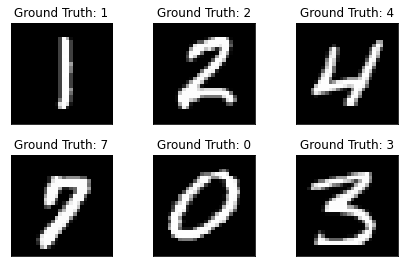

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(targets[i]))
    plt.xticks([])
    plt.yticks([])

## 2.1) Create and train a 2-layer MLP
For the network, use a single hidden layer of 512 neurons with a ReLU activation function for the first weight Linear layer. The output of the second Linear layer should be a softmax.

For optimisation, use the SGD optimizer with learning rate of 0.001, and the negative log-likelihood loss.

Train the network for 5 epochs on the train data, and report the prediction accuracy on the test data. You should be able to get about 90% correct.

Hint: check the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) for usage of the layers, optimizers and losses

In [ ]:
from torch.nn import Linear, Module
from torch.nn.functional import relu, log_softmax, nll_loss
from torch.optim import SGD

class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialise Linear layers
        # <REPLACE>

    def forward(self, x):
        # Perform feed-forward computation step
        # <REPLACE>
        output = ...
        return output

    
def train(
    model:Module, 
    train_loader:DataLoader, 
    optimizer: SGD, 
    epoch:int, 
    log_interval = 50
):
    # Set model to train mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # Reset the gradients
        # <REPLACE>
        
        # Feed the data through the model
        # <REPLACE>
        
        # Compute the negative log-likelihood loss
        # <REPLACE>
        
        # Backward propagate the gradients
        # <REPLACE>
        
        # Perform an update step using the optimizer
        # <REPLACE>
        
        if batch_idx % log_interval == 0:
            # Log (Optional)
            # <REPLACE>
        


def test(model:Module, test_loader:DataLoader):
    # Set model to evaluation mode
    model.eval()
    
    correct = 0
    
    # Don't accumulate gradients
    with torch.no_grad():
        for data, target in test_loader:
            # Feed the data through the model
            # <REPLACE>
            
            # Predict the class (it is the index of the max log-probability)
            # <REPLACE>
            
            # Add to the number of correct
            correct += # <REPLACE>
            
    test_loss /= len(test_loader.dataset)

    # Print results
    print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct, 
        len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)
    ))

In [ ]:
model = Net()
optimizer = SGD(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch, log_interval=50)
    test(model, test_loader)